In [2]:
from math import log2
def work(k, alpha, n, strings1, m, strings2):
    global lambda_c
    allInfo = dict()
    amountOfClasses = [0] * k
    for i in range(n):
        string = strings1[i]
        cl = int(string[0])
        settec = set(string[1:])
        amountOfClasses[cl - 1] += 1
        for j in settec:
            word = j
            if (word in allInfo):
                allInfo[word][cl - 1] += 1
            else:
                allInfo[word] = [0] * k
                allInfo[word][cl - 1] = 1
    #print(allInfo)
    matr = [0] * k
    for i in range(k):
        matr[i] = dict()
    for x in allInfo:
        for i in range(k):
            count = allInfo[x][i]
            matr[i][x] = (count + alpha) / (amountOfClasses[i] + alpha * 2)
    #print(matr)
    SMALL = 1e-3
    ans = [0] * m
    for j in range(m):
        string = strings2[j]
        words = set(string[1:])
        answer = [0] * k
        for i in range(k):
            #answer[i] = amountOfClasses[i] / sum(amountOfClasses) * lambda_c[i]
            answer[i] = log2(amountOfClasses[i] + SMALL) - log2(sum(amountOfClasses) + SMALL) + log2(lambda_c[i] + SMALL)
            for word in matr[i]:
                if (word in words):
                    #answer[i] *= (matr[i][word])
                    answer[i] += log2(matr[i][word] + SMALL)
                else:
                    #answer[i] *= 1 - (matr[i][word])
                    answer[i] += log2(1 - matr[i][word] + SMALL)
                #print(answer[i])
        #print(answer)
        if (answer[1] - answer[0] > 100):
            ans[j] = [0, 1]
        elif (-answer[1] + answer[0] > 100):
            ans[j] = [1, 0]
        else:
            ans[j] = [1 / (1 + 2 ** (answer[1] - answer[0])), 1 / (1 + 2 ** (answer[0] - answer[1]))]
    return ans

In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.metrics import f1_score

from os import path
from os import listdir

simplePath = 'C:\\Users\\ASUS\\'
blocks = range(1, 11)
bigData = [0] * 10
for i in range(10):
    bigData[i] = []
for i in blocks:
    full_path = path.join(simplePath, "part" + str(i) + "\\")
    for f_d in listdir(full_path):
        toAdd = []
        if ("spmsg" in f_d):
            toAdd.append(1)
        else:
            toAdd.append(2)
        file = open(path.join(full_path, f_d), "r")
        lines = file.readlines()
        line = [str(x) for x in lines[0].split()[1:]]
        toAdd.append(line)
        toAdd.append([])
        #print(toAdd)
        for line in lines[1:]:
            ls = [str(x) for x in line.split()]
            #print(ls)
            for elem in ls:
                toAdd[2].append(elem)
        bigData[i - 1].append(toAdd)


FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'C:\\Users\\ASUS\\part1\\'

In [4]:
lambda_c = [0.1, 1]
alpha = [0.1]
bl = [1, 2, 3]
best_of_the_best = []
for b in bl:
    for l in tqdm(range(10)):
        lambda_c[0] += 0.1
        #for alp in alpha:
        best_ans = [0] * 10
        for notUsed in range(10):
            strings1 = []
            strings2 = []
            for k in range(10):
                for message in bigData[k]:
                    goodBad = message[0]
                    text2 = [goodBad]
                    if (len(message[1]) - b <= 0):
                        text2.append('$'.join(message[1]) + '$')
                    else:
                        for i in range(len(message[1]) - b + 1):
                            primitiveString = '$'.join(message[1][i : i + b]) + '$'
                            text2.append(primitiveString)
                    if (len(message[2]) - b <= 0):
                        text2.append(','.join(message[2]))
                    else:
                        for i in range(len(message[2]) - b + 1):
                            primitiveString = ','.join(message[2][i : i + b])
                            text2.append(primitiveString)
                    if (k == notUsed):
                        strings2.append(text2)
                    else:
                        strings1.append(text2)
            #print(strings1)
            y_pred_raw = work(2, alp, len(strings1), strings1, len(strings2), strings2)
            y_true = [int(x[0]) for x in strings2]
            y_pred = [int(np.argmax(x) + 1) for x in y_pred_raw]
            best_ans[notUsed] = f1_score(y_true, y_pred)
        print((sum(best_ans) / 10))
        best_of_the_best.append([sum(best_ans) / 10, b, l, alp])

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]


NameError: name 'alp' is not defined

In [3]:
lambda_c = [0.1, 0.1]
alpha = [0.1]
bl = [1]
y_pred_raw = []
y_true = []
for alp in alpha:
    #for lam in lambda_c:
    for b in bl:
        best_ans = [0] * 10
        strings1 = []
        strings2 = []
        for k in range(10):
            for message in bigData[k]:
                goodBad = message[0]
                text2 = [goodBad]
                if (len(message[1]) - b <= 0):
                    text2.append('$'.join(message[1]) + '$')
                else:
                    for i in range(len(message[1]) - b + 1):
                        primitiveString = '$'.join(message[1][i : i + b]) + '$'
                        text2.append(primitiveString)
                if (len(message[2]) - b <= 0):
                    text2.append(','.join(message[2]))
                else:
                    for i in range(len(message[2]) - b + 1):
                        primitiveString = ','.join(message[2][i : i + b])
                        text2.append(primitiveString)
                strings2.append(text2)
                strings1.append(text2)
            #print(strings1)
        y_pred_raw = work(2, alp, len(strings1), strings1, len(strings2), strings2)
        y_true = [int(x[0]) for x in strings2]                  

7 605
480 610
65 608
480 610
0 579
0 579
0 579
480 610
480 610
1 588
480 610
0 579
0 579
0 579
12 606
0 579
0 579
0 579
0 579
480 610
0 579
0 579
0 579
480 610
0 579
28 608
480 610
1 595
0 579
0 579
0 579
0 579
143 609
480 610
0 579
0 579
0 579
69 608
480 610
480 610
480 610
480 610
0 579
480 610
480 610
0 579
480 610
0 579
480 610
0 579
480 610
0 579
2 599
0 579
0 579
120 609
50 608
0 579
480 610
0 579
480 610
0 579
480 610
0 579
0 579
0 579
0 579
480 610
0 579
0 579
90 608
0 579
480 610
111 608
0 579
0 579
27 607
0 579
0 579
180 610
0 579
0 579
100 608
480 610
0 579
0 579
480 610
480 610
480 610
0 579
0 579
118 609
0 579
480 610
0 579
480 610
105 608
480 610
0 579
480 610
0 579
480 610
0 579
113 608
0 579
0 579
0 579
0 579
480 610
0 579
0 579
0 579
0 579
172 610
0 579
0 579
0 579
0 579
0 579
31 608
0 579
0 579
0 579
0 579
480 610
3 603
0 579
0 581
91 608
13 606
96 608
0 579
480 610
0 579
0 579
0 579
0 579
75 608
480 610
0 579
64 608
480 610
0 579
480 610
86 608
0 579
0 579
171 610
48

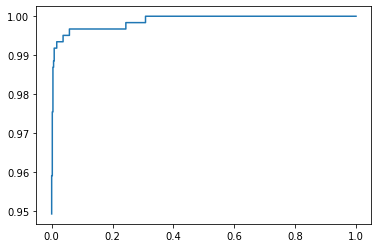

In [4]:
import matplotlib.pyplot as plt
y_pred_norm = []
for y in y_pred_raw:
    y_pred_norm.append([y[0] / (y[1] + y[0]), y[1] / (y[1] + y[0])])
arr_fpr = []
y_1 = y_true.count(1)
y_2 = y_true.count(2)
arr_tpr = []
for y in y_pred_norm:
    fpr = 0
    tpr = 0
    for i in range(len(y_pred_norm)):
        z = 0
        if (y_pred_norm[i][1] >= y[1]):
            z = 2
        else:
            z = 1
        if (y_true[i] == 1):
            if (z == 2):
                fpr += 1
        else:
            if (z == 2):
                tpr += 1
    print(fpr, tpr)
    arr_fpr.append(fpr / y_1)
    arr_tpr.append(tpr / y_2)
arr_fpr.sort()
arr_tpr.sort()
plt.plot(arr_fpr, arr_tpr, linestyle='solid')
plt.show()

In [5]:
y_pred = [int(np.argmax(x) + 1) for x in y_pred_raw]
print(f1_score(y_true, y_pred))
for i in range(len(y_true)):
    print(y_pred_norm[i])
    print(y_true[i])

0.9723404255319149
[5.739021335848324e-05, 0.9999426097866415]
1
[1.0, 0.0]
1
[0.9999999634975985, 3.6502401619396684e-08]
1
[1.0, 0.0]
1
[2.0399796777510539e-22, 1.0]
2
[0.0, 1.0]
2
[0.0, 1.0]
2
[1.0, 0.0]
1
[1.0, 0.0]
1
[9.751894625381576e-13, 0.9999999999990248]
2
[1.0, 0.0]
1
[0.0, 1.0]
2
[0.0, 1.0]
2
[0.0, 1.0]
2
[0.0006266991167169095, 0.9993733008832831]
1
[0.0, 1.0]
2
[0.0, 1.0]
2
[3.2602923701659505e-18, 1.0]
2
[0.0, 1.0]
2
[1.0, 0.0]
1
[0.0, 1.0]
2
[1.6932139288913878e-25, 1.0]
2
[3.586392995738997e-28, 1.0]
2
[1.0, 0.0]
1
[3.7515703087928634e-25, 1.0]
2
[0.8989933078658723, 0.1010066921341277]
2
[1.0, 0.0]
1
[2.5214057458664524e-11, 0.999999999974786]
2
[0.0, 1.0]
2
[0.0, 1.0]
2
[0.0, 1.0]
2
[0.0, 1.0]
2
[1.0, 1.850750037026901e-21]
1
[1.0, 0.0]
1
[0.0, 1.0]
2
[0.0, 1.0]
2
[0.0, 1.0]
2
[0.999999989591181, 1.0408819020392647e-08]
1
[1.0, 0.0]
1
[1.0, 0.0]
1
[1.0, 0.0]
1
[1.0, 0.0]
1
[0.0, 1.0]
2
[1.0, 0.0]
1
[1.0, 0.0]
1
[0.0, 1.0]
2
[1.0, 0.0]
1
[0.0, 1.0]
2
[1.0, 0.0]
1
[1.

In [13]:
lambda_c = [0.1, 1]
alpha = [0.1]
bl = [1]
best_of_the_best = []
y_pred_raw = []
y_true = []
lambd = []
fM = []
for b in bl:
    for l in tqdm(range(10)):
        lambda_c[0] += 0.1
        lambd.append(lambda_c[0])
        #for alp in alpha:
        strings1 = []
        strings2 = []
        for k in range(10):
            for message in bigData[k]:
                goodBad = message[0]
                text2 = [goodBad]
                if (len(message[1]) - b <= 0):
                    text2.append('$'.join(message[1]) + '$')
                else:
                    for i in range(len(message[1]) - b + 1):
                        primitiveString = '$'.join(message[1][i : i + b]) + '$'
                        text2.append(primitiveString)
                if (len(message[2]) - b <= 0):
                    text2.append(','.join(message[2]))
                else:
                    for i in range(len(message[2]) - b + 1):
                        primitiveString = ','.join(message[2][i : i + b])
                        text2.append(primitiveString)
                strings2.append(text2)
                strings1.append(text2)
        #print(strings1)
        y_pred_raw = work(2, alp, len(strings1), strings1, len(strings2), strings2)
        y_true = [int(x[0]) for x in strings2]
        y_pred = [int(np.argmax(x) + 1) for x in y_pred_raw]
        good = 0
        for i in range(len(y_true)):
            if (y_true[i] == y_pred[i] and y_true[i] == 1):
                good += 1
        fM.append(good / (y_1))




  0%|                                                                                           | 0/10 [00:00<?, ?it/s]


 10%|████████▎                                                                          | 1/10 [00:41<06:17, 41.99s/it]


 20%|████████████████▌                                                                  | 2/10 [01:33<05:57, 44.71s/it]


 30%|████████████████████████▉                                                          | 3/10 [02:19<05:17, 45.34s/it]


 40%|█████████████████████████████████▏                                                 | 4/10 [02:59<04:21, 43.53s/it]


 50%|█████████████████████████████████████████▌                                         | 5/10 [03:37<03:29, 41.98s/it]


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [04:18<02:46, 41.55s/it]


 70%|██████████████████████████████████████████████████████████                         | 7/10 [04:56<02:01, 40.49s/it]


 80%|████████████████

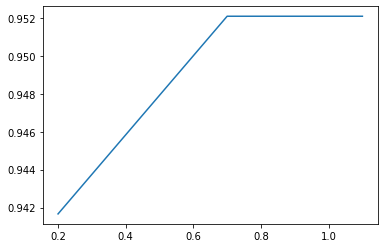

In [14]:
import matplotlib.pyplot as plt1
plt.plot(lambd, fM, linestyle='solid')
plt.show()

In [ ]:
[0.6, 0.4]
[0.2, ]